**HuBMAP - Hacking the Human Vasculature**

Segment instances of microvascular structures from healthy human kidney tissue slides.

**Goal of the Competition**

The goal of this competition is to segment instances of microvascular structures, including capillaries, arterioles, and venules. You'll create a model trained on 2D PAS-stained histology images from healthy human kidney tissue slides.

Your help in automating the segmentation of microvasculature structures will improve researchers' understanding of how the blood vessels are arranged in human tissues.

**Context**

The proper functioning of your body's organs and tissues depends on the interaction, spatial organization, and specialization of your cells—all 37 trillion of them. With so many cells, determining their functions and relationships is a monumental undertaking.

Current efforts to map cells involve the Vasculature Common Coordinate Framework (VCCF), which uses the blood vasculature in the human body as the primary navigation system. The VCCF crosses all scale levels--from the whole body to the single cell level--and provides a unique way to identify cellular locations using capillary structures as an address. However, the gaps in what researchers know about microvasculature lead to gaps in the VCCF. If we could automatically segment microvasculature arrangements, researchers could use the real-world tissue data to begin to fill in those gaps and map out the vasculature.

Competition host Human BioMolecular Atlas Program (HuBMAP) hopes to develop an open and global platform to map healthy cells in the human body. Using the latest molecular and cellular biology technologies, HuBMAP researchers are studying the connections that cells have with each other throughout the body.

There are still many unknowns regarding microvasculature, but your Machine Learning insights could enable researchers to use the available tissue data to augment their understanding of how these small vessels are arranged throughout the body. Ultimately, you'll be helping to pave the way towards building a Vascular Common Coordinate Framework (VCCF) and a Human Reference Atlas (HRA), which will identify how the relationships between cells can affect our health.

In [203]:
import glob
import os
import numpy as np
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import cv2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
train = glob.glob("/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/Dataset/Data/train/*")
test = glob.glob("/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/Dataset/Data/test/*")

In [19]:
print(f"Number of training files: {len(train)}")
print(f"Number of testing files: {len(test)}")

Number of training files: 6198
Number of testing files: 1


In [9]:
# Create a dictionary to hold the blood_vessel annotations for each image
blood_vessel_annotations = {}

# Open the annotations file
with open('/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/Dataset/Data/polygons.jsonl', 'r') as f:
    # For each line in the file
    for line in f:
        # Parse the line as JSON
        annotation = json.loads(line)

        # Get the image ID and the list of annotations for this image
        image_id = annotation['id']
        image_annotations = annotation['annotations']

        # Filter the annotations to keep only the blood_vessel ones
        blood_vessel_annotations_for_this_image = [a for a in image_annotations if a['type'] == 'blood_vessel']

        # Store the blood_vessel annotations in the dictionary
        blood_vessel_annotations[image_id] = blood_vessel_annotations_for_this_image

In [179]:
# map images
image_map = {impath.split('/')[-1].split('.')[0]: impath for impath in train}
image_map.update({impath.split('/')[-1].split('.')[0]: impath for impath in test})

In [77]:
# Extract the image ID from the file name
image_id = os.path.basename(image_path).split('.')[0]

# Get the 'blood_vessel' annotations for this image, or an empty list if not found
annotations = blood_vessel_annotations.get(image_id, [])

/content/drive/MyDrive/Kaggle/HuBMAP - Hacking the Human Vasculature/Dataset/Data/train/0006ff2aa7cd.tif
0006ff2aa7cd


Number of blood vessels: 8


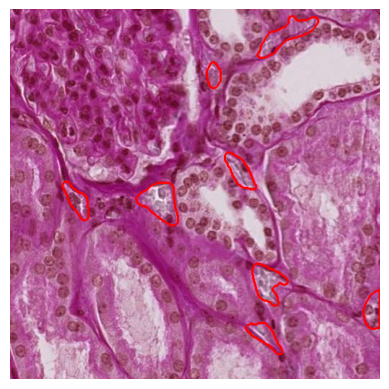

Number of blood vessels: 1


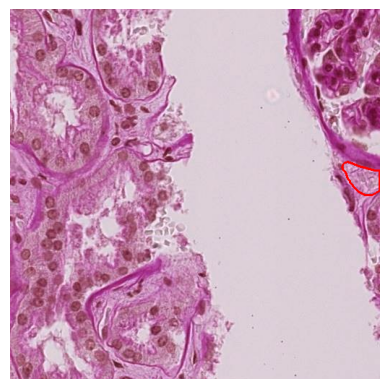

Number of blood vessels: 3


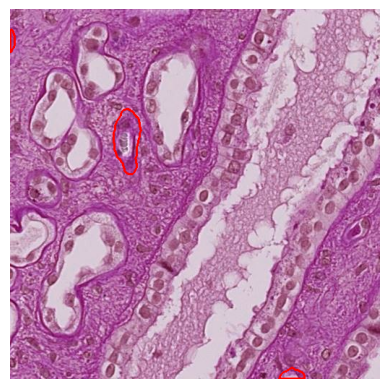

Number of blood vessels: 7


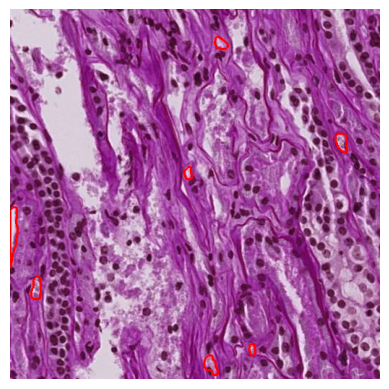

Number of blood vessels: 10


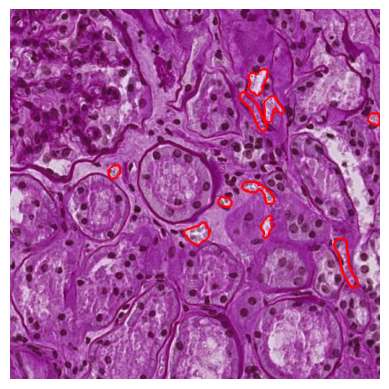

In [201]:
for image_id in list(blood_vessel_annotations.keys())[:5]:
  polygon = blood_vessel_annotations[image_id]
  # Open the image file
  image = cv2.imread(image_map[image_id])
  # Convert the image to a NumPy array (optional, only if you need to manipulate the image data)
  # count number of blood vessels
  number_of_blood_vessels = 0
  for vessel in polygon:
    number_of_blood_vessels = number_of_blood_vessels+1
    lines = np.array(vessel['coordinates'])
    lines = lines.reshape(-1, 1, 2)
    # Draw the lines on the copy
    cv2.polylines(image, lines, True, (255,0,0), 2)
  #display image and number of blood vesels
  print('Number of blood vessels: ' + str(number_of_blood_vessels))
  plt.imshow(image)
  plt.axis('off')
  plt.show()